In [ ]:
import matplotlib.pyplot as plt

from tools.tools import *
from data.synthetic.tools.data_generation_tools import *
from data.synthetic.data_set import *
from visualization.line_plot import *
from models.statistical.rule_based_functions import *
from models.statistical.stationary_models import *

from statsmodels.tsa.statespace.sarimax import SARIMAX


set_global_seed(0)


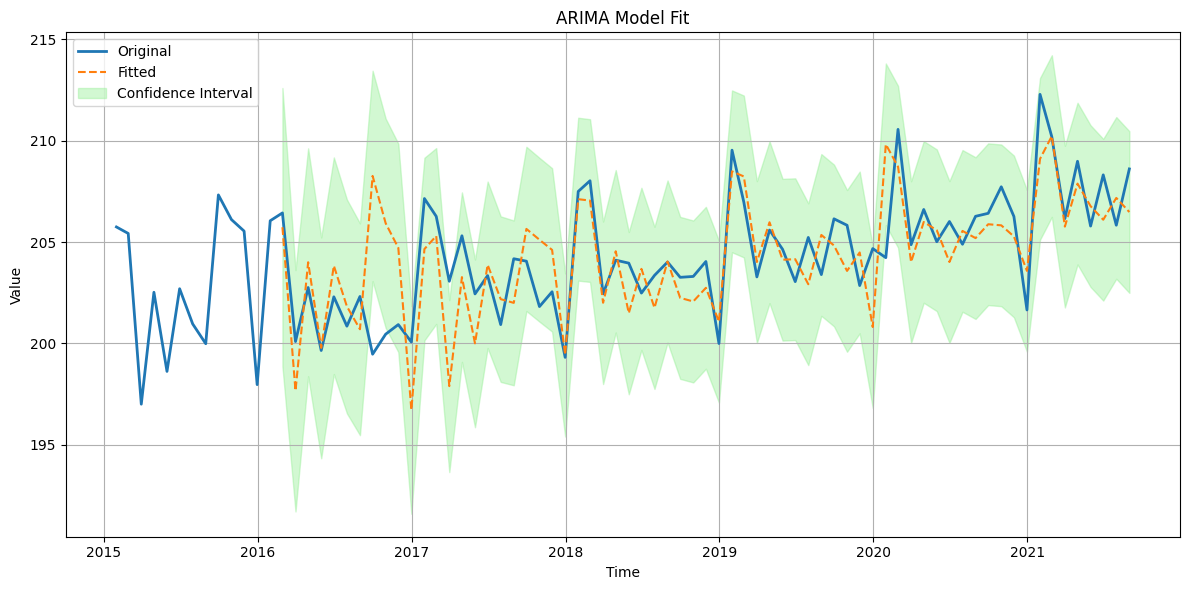

In [2]:
df = get_ts_1()
ts = df['value']

model = SARIMAX(ts, order=(0, 1, 1), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit()
fitted_vals = model_fit.fittedvalues[13:]

pred = model_fit.get_prediction(start=13, alpha=0.05)
conf_int = pred.conf_int()

plot_fit(ts, fitted_vals, CI=conf_int)

In [ ]:
anoms = get_residual_outliers(ts, fitted_vals)
plot_ts_with_anom(ts, anoms)

In [ ]:
anoms = get_prediction_outliers(ts, model_fit)
plot_ts_with_anom(ts, anoms)

2016-02-29    False
2016-03-31    False
2016-04-30    False
2016-05-31    False
2016-06-30    False
              ...  
2021-04-30    False
2021-05-31    False
2021-06-30    False
2021-07-31    False
2021-08-31    False
Freq: ME, Length: 67, dtype: bool


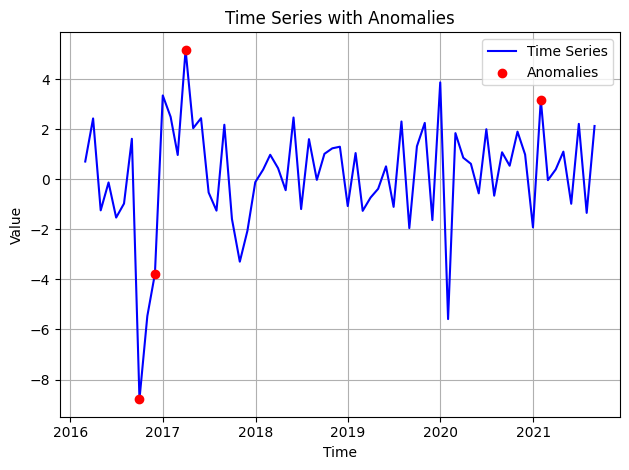

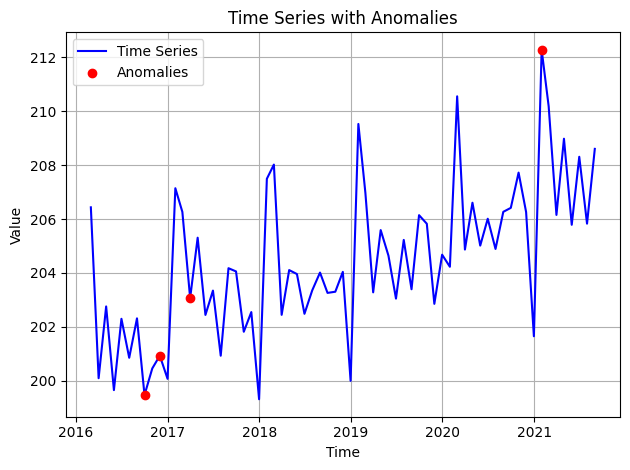

In [ ]:
residuals = model_fit.resid[13:]
anoms = cusum(residuals, threshold=3*residuals.std(), drift=0.1*residuals.std())

plot_ts_with_anom(residuals, anoms)
plot_ts_with_anom(ts[13:], anoms)